In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Sympy

In [59]:
from sympy import init_printing
init_printing()

In [60]:
x= sympy.symbols('x')

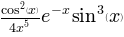

In [61]:
Result = sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))
Result

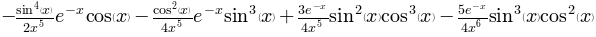

In [62]:
Resultprime = Result.diff(x)
Resultprime

In [63]:
from sympy.utilities.lambdify import lambdify
u = Resultprime
print(u)

-exp(-x)*sin(x)**4*cos(x)/(2*x**5) - exp(-x)*sin(x)**3*cos(x)**2/(4*x**5) + 3*exp(-x)*sin(x)**2*cos(x)**3/(4*x**5) - 5*exp(-x)*sin(x)**3*cos(x)**2/(4*x**6)


In [64]:
u_lamb = lambdify((x), u)
print("The value of u at x=2.2 is {}.".format(u_lamb(2.2)))

The value of u at x=2.2 is -0.00026648912670920613.


traffic flow

In [35]:
 #constants
Vm1 = 80
Vm2 = 136
rhoi1 = 10
rhoi2 = 20
rhoBC1 = 10
rhoBC2 = 20
L = 11
rhom = 250
nx = 51
dx = L/(nx-1)
dt = 0.001
x = numpy.linspace(0,L,nx)

rho = numpy.ones(nx) #arrays
rhon = numpy.ones(nx)

In [36]:
def GetRho0(rhoi):
    rho = numpy.ones(nx)*rhoi
    rho[10:20] = 50
    return rho

In [37]:
def GetRho(T,dt,rho0,rhoBC):
    rhon = numpy.ones(nx)
    rho = rho0
    for n in range(1, Get_nt(T,dt)): 
        rhon = rho.copy() 
        rho[1:] = rhon[1:]-Vm*dt/dx*(rhon[1:]-rhon[0:-1])+Vm/rhom*dt/dx*(rhon[1:]**2-rhon[0:-1]**2)
        rho[0] = rhoBC
    return rho

In [38]:
def Get_nt(T,dt):
    nt = int(T/60/dt)
    print( "At time t=",T,"minutes" )
    return nt

At time t= 6.0 minutes
[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.00000003  10.00000016
  10.00000086  10.00000412  10.00001783  10.00007034  10.00025458
  10.00085102  10.00264251  10.00766178  10.0208415   10.05341663
  10.12948055  10.29772473  10.65053696  11.35036214  12.65351012
  14.89646927  18.3743208   23.06385534  28.35226654  33.17325439
  36.61825125  38.40174992  38.76266933  38.11598331  36.82705918
  35.15255876  33.25751938  31.24639346  29.18742436  27.12816228
  25.10451886  23.14579824]


In [44]:
def GetV(rho, Vm, rhom):
    V = numpy.ones(nx)
    V = Vm*(1-rho/rhom)
    print("Average speed is",numpy.average(V)/3.6,"m/s "\
          "and minimum speed is",numpy.min(V)/3.6,"m/s when maximum speed is",Vm,"km/h")

In [50]:
GetV( GetRho(0.0,dt,GetRho0(rhoi1),rhoBC1) , Vm1, rhom)

At time t= 0.0 minutes
Average speed is 20.6361655773 m/s and minimum speed is 17.7777777778 m/s when maximum speed is 80 km/h


In [51]:
GetV( GetRho(3.0,dt,GetRho0(rhoi1),rhoBC1) , Vm1, rhom)

At time t= 3.0 minutes
Average speed is 20.6361659024 m/s and minimum speed is 18.163766147 m/s when maximum speed is 80 km/h


In [52]:
GetV( GetRho(6.0,dt,GetRho0(rhoi1),rhoBC1) , Vm1, rhom)

At time t= 6.0 minutes
Average speed is 20.7303256984 m/s and minimum speed is 18.7766516147 m/s when maximum speed is 80 km/h


In [53]:
GetV( GetRho(0.0,dt,GetRho0(rhoi2),rhoBC2) , Vm2, rhom)

At time t= 0.0 minutes
Average speed is 33.8666666667 m/s and minimum speed is 30.2222222222 m/s when maximum speed is 136 km/h


In [54]:
GetV( GetRho(3.0,dt,GetRho0(rhoi2),rhoBC2) , Vm2, rhom)

At time t= 3.0 minutes
Average speed is 33.8666667139 m/s and minimum speed is 30.6820137293 m/s when maximum speed is 136 km/h


Incorrect for final blank but original one works without function:

In [58]:
Vm = 136 #constants
L = 11
rhom = 250
nx = 51
dx = L/(nx-1)
dt = 0.001
T = 3.0
nt = int(T/60/dt)
x = numpy.linspace(0,L,nx)

rho = numpy.ones(nx) #arrays
rhon = numpy.ones(nx)
rho = numpy.ones(nx)*20
rho[10:20] = 50

for n in range(1, nt):  
    rhon = rho.copy() 
    rho[1:] = rhon[1:]-Vm*dt/dx*(rhon[1:]-rhon[0:-1])+Vm/rhom*dt/dx*(rhon[1:]**2-rhon[0:-1]**2)
    rho[0] = 20

def Vminandavg(rhon, Vm, rhom):
    V = numpy.ones(nx)
    V = Vm*(1-rho/rhom)
    print("Avg V is",numpy.average(V)/3.6,"m/s")
    n = numpy.min(V)/3.6
    print("Min V is",n,"m/s")

Vminandavg(rho, Vm, rhom)

Avg V is 33.8704871068 m/s
Min V is 30.9462036369 m/s
